In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
x=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [5]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [6]:
L.fit(x_train,y_train)
y_pred = L.predict(x_test)

In [7]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score = ",r2_score(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score =  0.5188113124539246
RMSE =  48.727137609532534


                                          RIDGE REGRESSION

In [8]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001)

In [9]:
R.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [10]:
y_pred = R.predict(x_test)

In [11]:
print("r2_score = ",r2_score(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score =  0.518973263588495
RMSE =  48.718937001819555


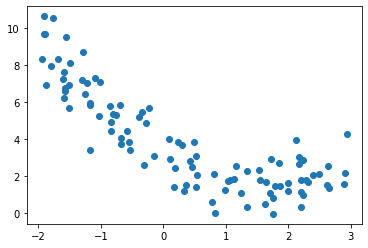

In [12]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

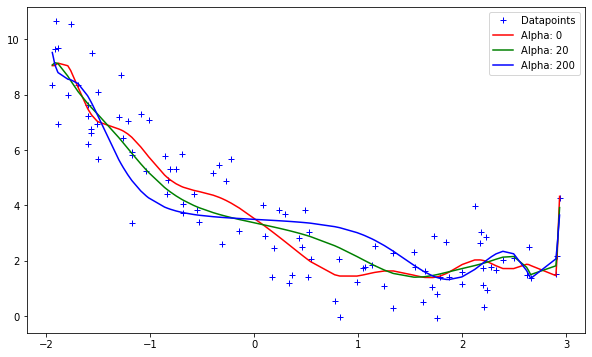

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

                                        RIDGE REGRESSION CODE FOR 1D DATA

In [14]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

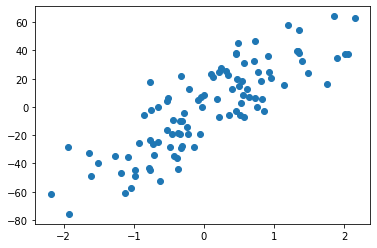

In [15]:
plt.scatter(x,y)

In [16]:
lr = LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [17]:
R = Ridge(alpha=10)
R.fit(x,y)
print(R.coef_)
print(R.intercept_)

[24.9546267]
-2.1269130035235735


In [18]:
RR = Ridge(alpha=100)
RR.fit(x,y)
print(RR.coef_)
print(RR.intercept_)

[12.93442104]
-1.4248441496033308


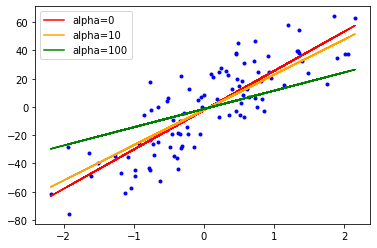

In [19]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,R.predict(x),color='orange',label='alpha=10')
plt.plot(x,RR.predict(x),color='green',label='alpha=100')
plt.legend()

In [20]:
print("r2_0 = ",r2_score(y,lr.predict(x)))
print("r2_10 = ",r2_score(y,R.predict(x)))
print("r2_100 = ",r2_score(y,RR.predict(x)))

r2_0 =  0.7035182396294911
r2_10 =  0.6960172225909294
r2_100 =  0.5020011026155695


In [21]:
class MyRidge:
    
    def __init__(self,alpha=0.1):
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha
        
    def fit(self,x_train,y_train):
        num=0
        den=0
        
        for i in range(x_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(x_train[i] - x_train.mean())
            den = den + (x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())
        den = den + self.alpha
        self.coef_ = num/den
        self.intercept_ = y_train.mean() - (self.coef_*x_train.mean())
        print(" m = ",self.coef_)
        print(" b = ",self.intercept_)
        
    def predict(self,x_test):
        return ((x_test*self.coef_) + self.intercept_)

In [22]:
MyR = MyRidge(alpha = 10)
MyR.fit(x,y)
print("r2_10 = ",r2_score(y,MyR.predict(x)))

 m =  [24.9546267]
 b =  [-2.126913]
r2_10 =  0.6960172225909291


                                   RIDGE REGRESSION CODE FOR N'D DATA

In [23]:
from sklearn.datasets import load_diabetes

In [24]:
x,y = load_diabetes(return_X_y=True)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [26]:
reg = Ridge(alpha=0.1,solver = 'cholesky')

In [27]:
reg.fit(x_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [28]:
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [29]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [30]:
class MyMultiRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1])
        I[0][0]=0
        result = np.linalg.inv(np.dot(x_train.T,x_train)+ self.alpha*I).dot(x_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
        
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [31]:
mmr = MyMultiRidge(alpha = 0.1)

In [32]:
mmr.fit(x_train,y_train)

In [33]:
y_pred = mmr.predict(x_test)

In [34]:
r2_score(y_test,y_pred)

0.4693128853309805

# RIDGE REGRESSION USING GRADIENT DECENT

In [44]:
x,y = load_diabetes(return_X_y=True)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [46]:
from sklearn.linear_model import SGDRegressor

In [47]:
reg = SGDRegressor(penalty='12',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [49]:
reg.fit(x_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

InvalidParameterError: The 'penalty' parameter of SGDRegressor must be a str among {'l1', 'elasticnet', 'l2'} or None. Got '12' instead.